In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# Load the dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

# Preview
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
print("Rows, Columns:", df.shape)
df.info()


Rows, Columns: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  T

In [4]:
# Summary of numeric columns
df.describe()

# Missing-value report
missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]
missing_report


Comments    525600
dtype: int64

In [5]:
# Columns to check
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers = (z_scores > 3)
outlier_counts = np.sum(outliers, axis=0)

print("Outlier count per feature:")
print(dict(zip(numeric_cols, outlier_counts)))


Outlier count per feature:
{'GHI': np.int64(2477), 'DNI': np.int64(7586), 'DHI': np.int64(2986), 'ModA': np.int64(1604), 'ModB': np.int64(2041), 'WS': np.int64(3967), 'WSgust': np.int64(3665)}


In [6]:
# Fill missing numeric columns with median
df_clean = df.copy()
df_clean[numeric_cols] = df_clean[numeric_cols].apply(lambda x: x.fillna(x.median()))


In [9]:
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)
print("✅ Cleaned data saved (not to be committed to Git).")


✅ Cleaned data saved (not to be committed to Git).


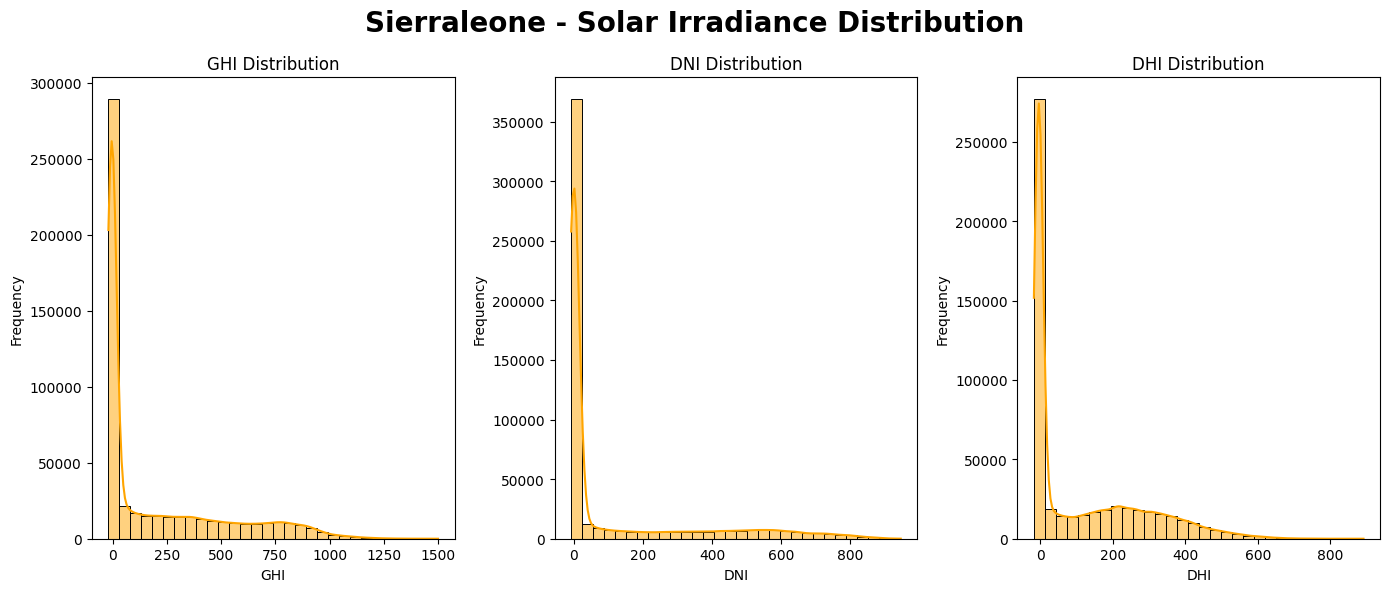

In [10]:
solar_features = ['GHI', 'DNI', 'DHI']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(solar_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_clean[feature], kde=True, bins=30, color='orange')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.suptitle('Sierraleone - Solar Irradiance Distribution', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


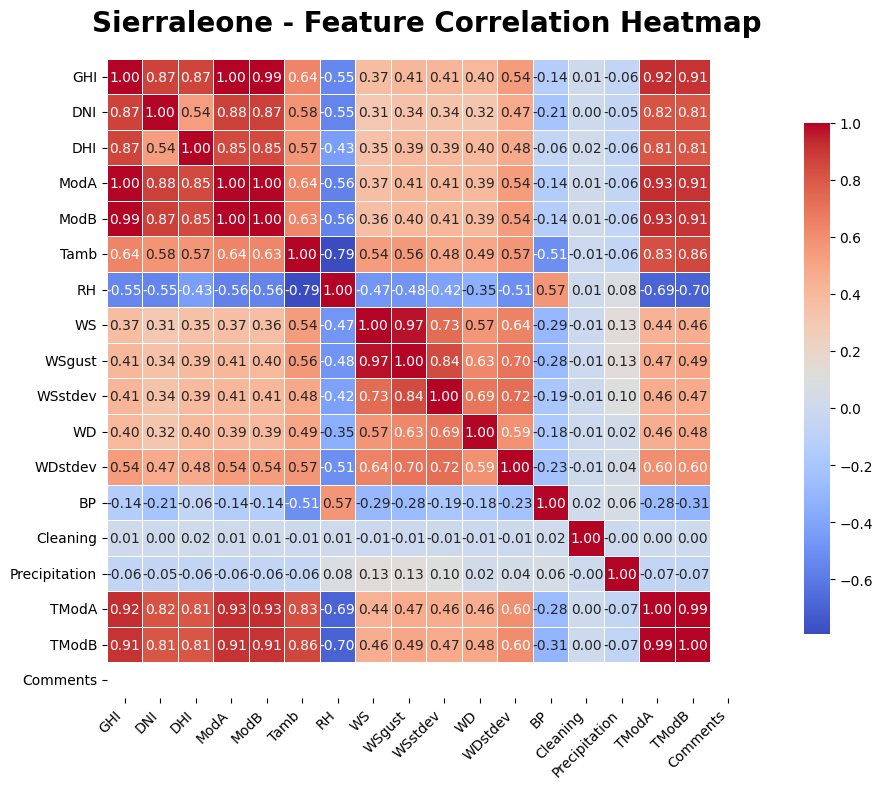

In [11]:
plt.figure(figsize=(12, 8))
corr = df_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, cbar_kws={'shrink': 0.8}, square=True)
plt.title("Sierraleone - Feature Correlation Heatmap", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


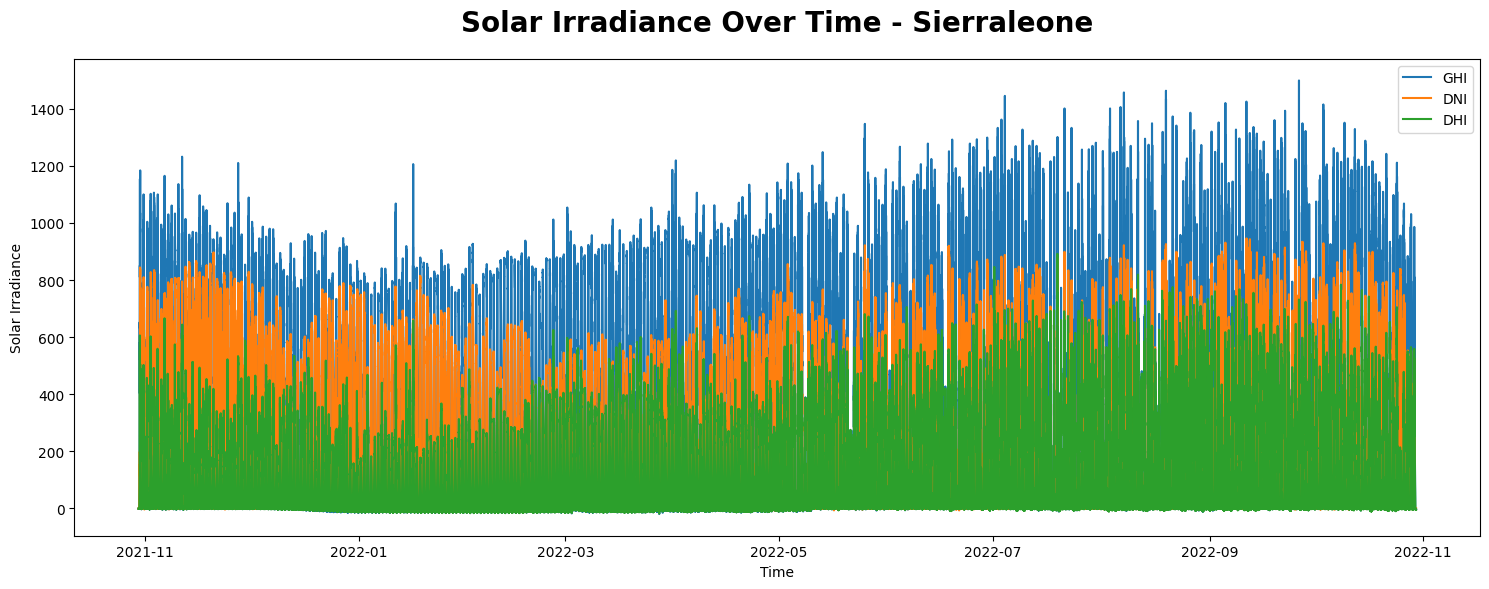

In [12]:
# Convert timestamp to datetime if not already
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')

plt.figure(figsize=(15, 6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], label='GHI')
plt.plot(df_clean['Timestamp'], df_clean['DNI'], label='DNI')
plt.plot(df_clean['Timestamp'], df_clean['DHI'], label='DHI')
plt.xlabel('Time')
plt.ylabel('Solar Irradiance')
plt.title('Solar Irradiance Over Time - Sierraleone', fontsize = 20,fontweight='bold', pad=20)
plt.legend()
plt.tight_layout()
plt.show()


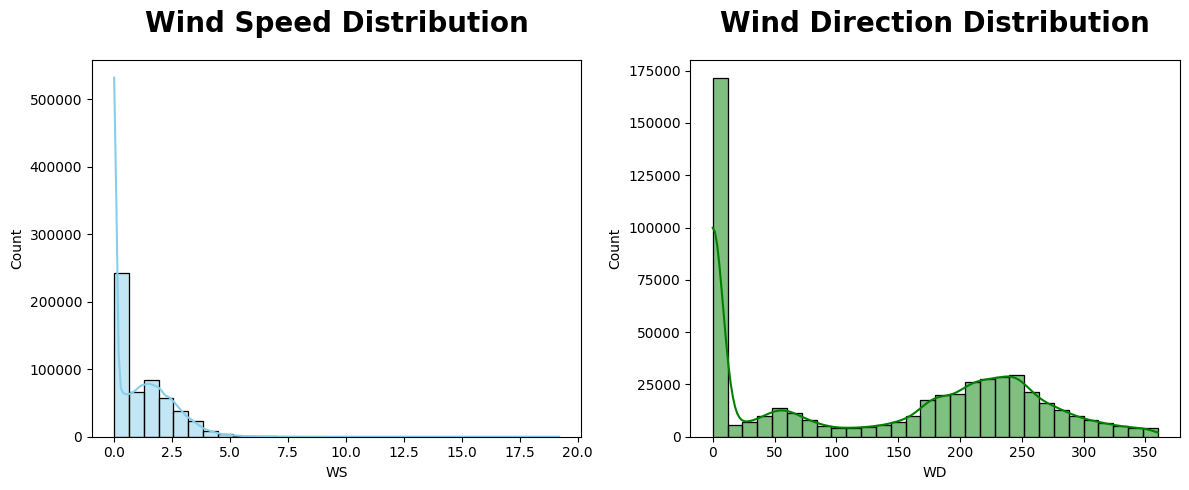

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_clean['WS'], kde=True, bins=30, color='skyblue')
plt.title('Wind Speed Distribution' , fontsize = 20,fontweight='bold', pad=20)

plt.subplot(1,2,2)
sns.histplot(df_clean['WD'], kde=True, bins=30, color='green')
plt.title('Wind Direction Distribution' , fontsize = 20,fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


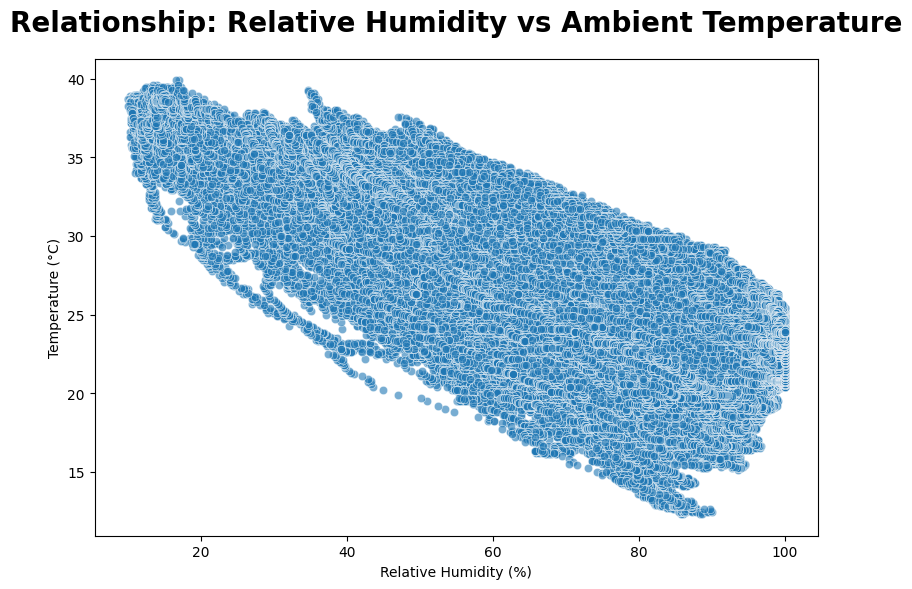

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.6)
plt.title('Relationship: Relative Humidity vs Ambient Temperature', fontsize = 20,fontweight='bold', pad=20)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()


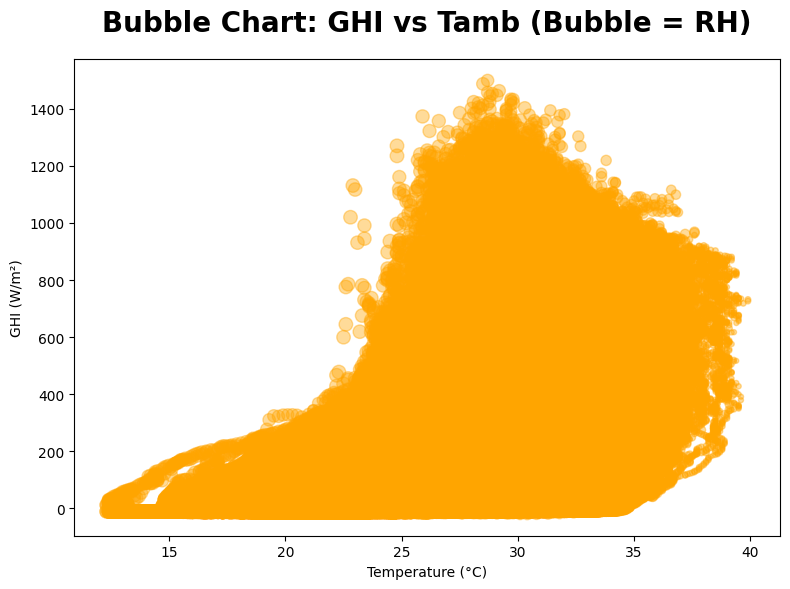

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'],
            s=df_clean['RH'], alpha=0.4, color='orange')
plt.title('Bubble Chart: GHI vs Tamb (Bubble = RH)', fontsize = 20,fontweight='bold', pad=20)
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()
